In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv(r"D:\School\Semester 7\social\recommandation system\study.csv")
df.head()

,title,titleUrl,channelname,time
0,Watched Relationship between Virtual Functions...,https://www.youtube.com/watch?v=T8f4ajtFU9g,CodeBeauty,2024-09-17T13:04:44.833Z
1,Watched C++ OOP - Introduction to classes and ...,https://www.youtube.com/watch?v=iVLQeWbgbXs,CodeBeauty,2024-09-17T13:04:25.667Z
2,Watched Object Oriented Programming (OOP) in C...,https://www.youtube.com/watch?v=wN0x9eZLix4,freeCodeCamp.org,2024-09-17T12:59:56.780Z
3,Watched How to install OpenSSL on Windows,https://www.youtube.com/watch?v=coaGBdUcKiw,Straight To Coding,2024-09-16T17:17:12.274Z
4,Watched How to Install OpenSSL on Windows,https://www.youtube.com/watch?v=cBa87N_BZ4s,BoostMyTool,2024-09-16T17:16:37.860Z


In [3]:
df['title'] = df['title'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)
df

,title,titleUrl,channelname,time
0,"Relationship between Virtual Functions, Pure V...",https://www.youtube.com/watch?v=T8f4ajtFU9g,CodeBeauty,2024-09-17T13:04:44.833Z
1,C++ OOP - Introduction to classes and objects ...,https://www.youtube.com/watch?v=iVLQeWbgbXs,CodeBeauty,2024-09-17T13:04:25.667Z
2,Object Oriented Programming (OOP) in C++ Course,https://www.youtube.com/watch?v=wN0x9eZLix4,freeCodeCamp.org,2024-09-17T12:59:56.780Z
3,How to install OpenSSL on Windows,https://www.youtube.com/watch?v=coaGBdUcKiw,Straight To Coding,2024-09-16T17:17:12.274Z
4,How to Install OpenSSL on Windows,https://www.youtube.com/watch?v=cBa87N_BZ4s,BoostMyTool,2024-09-16T17:16:37.860Z
...,...,...,...,...
4749,#1 Getting Started | JavaScript Tutorial for B...,https://www.youtube.com/watch?v=POPLF-Qc0OU,Telusko,2021-10-20T04:25:57.561Z
4750,#1 Getting Started | JavaScript Tutorial for B...,https://www.youtube.com/watch?v=POPLF-Qc0OU,Telusko,2021-10-19T05:54:26.313Z
4751,#0 JavaScript Tutorial for Beginners | Introdu...,https://www.youtube.com/watch?v=PlbupGCBV6w,Telusko,2021-10-19T05:36:52.360Z
4752,#0 JavaScript Tutorial for Beginners | Introdu...,https://www.youtube.com/watch?v=PlbupGCBV6w,Telusko,2021-10-18T09:45:11.545Z


In [4]:
df.isnull().sum()

title            0
titleUrl         0
channelname    102
time             0
dtype: int64

In [5]:
df['channelname'].fillna('unknown',inplace=True)
df.isnull().sum()

title          0
titleUrl       0
channelname    0
time           0
dtype: int64

In [42]:
df['combined_features'] = df['title'] + ' ' + df['channelname']
df['combined_features'].tail()

4749    #1 Getting Started | JavaScript Tutorial for B...
4750    #1 Getting Started | JavaScript Tutorial for B...
4751    #0 JavaScript Tutorial for Beginners | Introdu...
4752    #0 JavaScript Tutorial for Beginners | Introdu...
4753    #0 JavaScript Tutorial for Beginners | Introdu...
Name: combined_features, dtype: object

In [41]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])
print(tfidf_matrix)

  (0, 1582)	0.3086276843689818
  (0, 2614)	0.18904483634801336
  (0, 5102)	0.2214617401561377
  (0, 1510)	0.23001348999927093
  (0, 385)	0.23219616435990484
  (0, 5677)	0.3086276843689818
  (0, 2915)	0.47143190709219496
  (0, 7595)	0.5553172627629865
  (0, 5907)	0.29541171728113963
  (1, 980)	0.3172565540609534
  (1, 5052)	0.5179414445918227
  (1, 3669)	0.2751130722786575
  (1, 1582)	0.5179414445918227
  (1, 5102)	0.3716588609113674
  (1, 1510)	0.3860104757919199
  (2, 5139)	0.42632312352647456
  (2, 2888)	0.43326426077788177
  (2, 1837)	0.3110860615534328
  (2, 5621)	0.2752912279099699
  (2, 5144)	0.40655227148603396
  (2, 5051)	0.3933321118195635
  (2, 5102)	0.37145117738853556
  (3, 1613)	0.3087541802407424
  (3, 6804)	0.5683342163775765
  (3, 7762)	0.37760448633383215
  :	:
  (4749, 3767)	0.3850375292596787
  (4749, 7086)	0.3336394649211072
  (4749, 7341)	0.29723610214490914
  (4749, 980)	0.35315904434339296
  (4750, 6737)	0.5256940295342868
  (4750, 3030)	0.5010049748265244
  (475

In [27]:

# Step 3: Compute the cosine similarity between videos
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on a video index
def get_recommendations(video_index, cosine_sim=cosine_sim):
    # Get similarity scores for the selected video
    global sim_scores
    sim_scores = list(enumerate(cosine_sim[video_index]))
    
    # Sort videos based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the most similar videos (excluding the video itself)
    sim_scores = sim_scores[1:6]  # Top 5 similar videos
    
    # Get the video titles of the recommended videos
    recommended_videos = [df['title'].iloc[i[0]] for i in sim_scores]
    
    return recommended_videos

# Example: Get recommendations for the first video (index 0)
#video_index = 1818
video_index = 1882

recommended_videos = get_recommendations(video_index)
print("Recommended videos for '{}':".format(df['title'].iloc[video_index]))
print()
for video in recommended_videos:
    print(video)

Recommended videos for 'What is Explainable AI?':

AI vs Machine Learning
What is MLOps?
Supervised vs. Unsupervised Learning
Interview Experience at IBM ISL | IBM Interview Coding Questions | 2024 | SDE @IBM IBM Watsonx
Explainable AI explained! | #1 Introduction


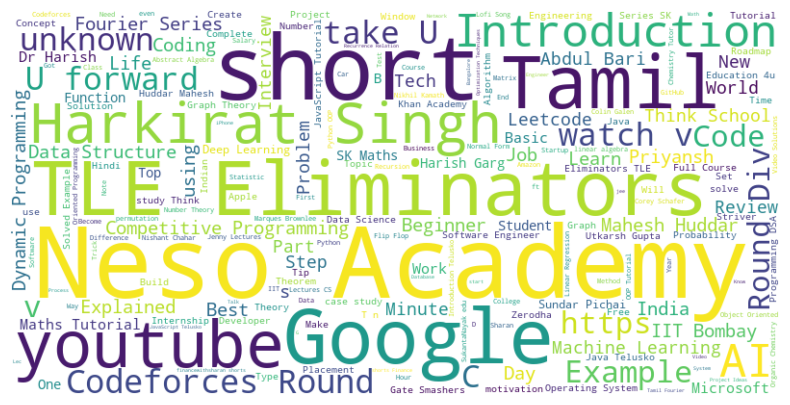

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word cloud for 'combined_features'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['combined_features']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


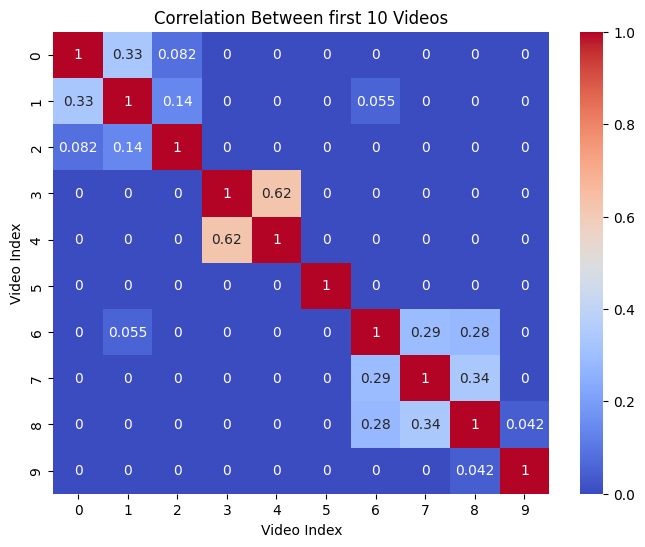

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Slice the cosine similarity matrix to show only the top 10 videos
cosine_sim_10 = cosine_sim[:10, :10]

# Create a heatmap of cosine similarity for top 10 videos
plt.figure(figsize=(8, 6))  # Adjusting the figure size
sns.heatmap(cosine_sim_10, cmap='coolwarm', annot=True)
plt.title('Correlation Between first 10 Videos')
plt.xlabel('Video Index')
plt.ylabel('Video Index')
plt.show()


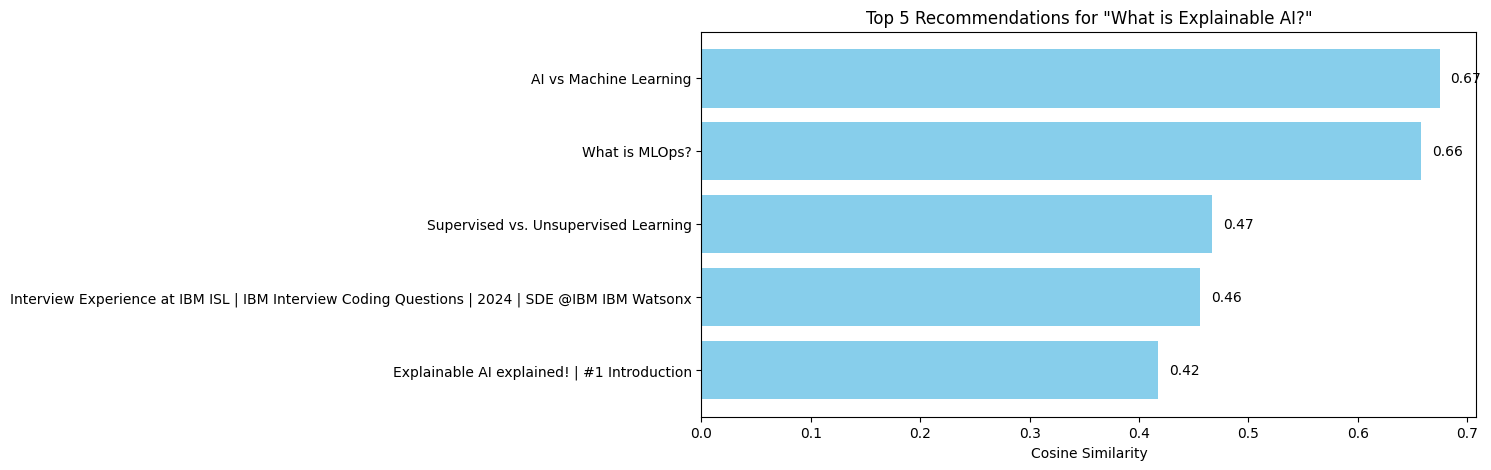

In [50]:
import matplotlib.pyplot as plt

def plot_top_recommendations(video_index, n=5):
    # Get recommendations for a particular video
    sim_scores = list(enumerate(cosine_sim[video_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  # Top N similar videos

    # Plot the top N recommendations
    video_titles = [df['title'].iloc[i[0]] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(video_titles, similarity_scores, color='skyblue')
    plt.xlabel('Cosine Similarity')
    plt.title(f'Top {n} Recommendations for "{df["title"].iloc[video_index]}"')
    plt.gca().invert_yaxis()

    # Add text annotations on the bars
    for bar, score in zip(bars, similarity_scores):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                 f'{score:.2f}', va='center', fontsize=10)

    plt.show()

# Example: Plot top 5 recommendations for video at index 1882
plot_top_recommendations(1882, n=5)


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df=pd.read_csv(r"D:\School\Semester 7\social\recommandation system\study.csv")
df['title'] = df['title'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)
df['channelname'].fillna('unknown',inplace=True)
df.head()

,title,titleUrl,channelname,time
0,"Relationship between Virtual Functions, Pure V...",https://www.youtube.com/watch?v=T8f4ajtFU9g,CodeBeauty,2024-09-17T13:04:44.833Z
1,C++ OOP - Introduction to classes and objects ...,https://www.youtube.com/watch?v=iVLQeWbgbXs,CodeBeauty,2024-09-17T13:04:25.667Z
2,Object Oriented Programming (OOP) in C++ Course,https://www.youtube.com/watch?v=wN0x9eZLix4,freeCodeCamp.org,2024-09-17T12:59:56.780Z
3,How to install OpenSSL on Windows,https://www.youtube.com/watch?v=coaGBdUcKiw,Straight To Coding,2024-09-16T17:17:12.274Z
4,How to Install OpenSSL on Windows,https://www.youtube.com/watch?v=cBa87N_BZ4s,BoostMyTool,2024-09-16T17:16:37.860Z


In [44]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.3309469  0.08226222 ... 0.         0.         0.        ]
 [0.3309469  1.         0.13805312 ... 0.26081711 0.26081711 0.26081711]
 [0.08226222 0.13805312 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.26081711 0.         ... 1.         1.         1.        ]
 [0.         0.26081711 0.         ... 1.         1.         1.        ]
 [0.         0.26081711 0.         ... 1.         1.         1.        ]]


In [46]:
def get_recommendations(video_index, cosine_sim=cosine_sim):
    global sim_scores
    sim_scores = list(enumerate(cosine_sim[video_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6] 
    recommended_videos = [df['title'].iloc[i[0]] for i in sim_scores]
    return recommended_videos
video_index = 1882
recommended_videos = get_recommendations(video_index)

print("Recommended videos for '{}':".format(df['title'].iloc[video_index]))
print()
for video in recommended_videos:
    print(video)

Recommended videos for 'What is Explainable AI?':

AI vs Machine Learning
What is MLOps?
Supervised vs. Unsupervised Learning
Interview Experience at IBM ISL | IBM Interview Coding Questions | 2024 | SDE @IBM IBM Watsonx
Explainable AI explained! | #1 Introduction


In [22]:
df['time_watched'] = pd.to_datetime(df['time'], utc=True, errors='coerce')
df['day_of_week'] = df['time_watched'].dt.day_name()

# Step 4: Analyze overall patterns by day of the week
# Example: Group by day of the week and count the number of videos watched
day_of_week_stats = df.groupby('day_of_week').size().reset_index(name='video_count')

# Sort days of the week to maintain order
day_of_week_stats['day_of_week'] = pd.Categorical(day_of_week_stats['day_of_week'],
                                                   categories=['Monday', 'Tuesday', 'Wednesday', 
                                                               'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                   ordered=True)
day_of_week_stats = day_of_week_stats.sort_values('day_of_week')

# Step 5: Recommend videos based on the overall day-of-the-week patterns
def recommend_videos_based_on_day(day, df):
    # Filter videos watched on the specified day
    day_videos = df[df['day_of_week'] == day]
    
    # Recommend videos from the same channels or similar titles
    # For simplicity, recommend all videos from the same channels
    recommended_videos = df[df['channelname'].isin(day_videos['channelname'])]
    
    # Exclude already watched videos on that day
    recommended_videos = recommended_videos[~recommended_videos['title'].isin(day_videos['title'])]
    
    return recommended_videos[['title', 'channelname', 'day_of_week']]

# Step 6: Get recommendations for a specific day of the week
day = 'Monday'  # Example: recommend videos for Monday
recommendations = recommend_videos_based_on_day(day, df)

# Display the day-of-the-week statistics and recommendations
print("Day-of-the-Week Statistics:\n", day_of_week_stats)
print("\nRecommendations for", day + ":\n", recommendations)

Day-of-the-Week Statistics:
   day_of_week  video_count
1      Monday          656
5     Tuesday          598
6   Wednesday          727
4    Thursday          727
0      Friday          646
2    Saturday          743
3      Sunday          650

Recommendations for Monday:
                                                   title  \
19    How to Commit and Push to Github from VSCode (...   
20    How to Push Code to Github from Visual Studio ...   
29    Day 10 - Resume Discussion & Career Guidance |...   
30    Day 9 - AWS CICD Deployment | MLOPs Production...   
31    BentoML | Build Production Grade AI Applicatio...   
...                                                 ...   
4744  Local linearization | Derivative applications ...   
4745  Fractional powers differentiation | Derivative...   
4746                     The Power Rule For Derivatives   
4749  #1 Getting Started | JavaScript Tutorial for B...   
4750  #1 Getting Started | JavaScript Tutorial for B...   

                

In [23]:
day_of_week_stats

,day_of_week,video_count
1,Monday,656
5,Tuesday,598
6,Wednesday,727
4,Thursday,727
0,Friday,646
2,Saturday,743
3,Sunday,650


In [24]:
recommendations

,title,channelname,day_of_week
19,How to Commit and Push to Github from VSCode (...,The Code City,Sunday
20,How to Push Code to Github from Visual Studio ...,The Code City,Sunday
29,Day 10 - Resume Discussion & Career Guidance |...,DSwithBappy,Saturday
30,Day 9 - AWS CICD Deployment | MLOPs Production...,DSwithBappy,Saturday
31,BentoML | Build Production Grade AI Applicatio...,DSwithBappy,Saturday
...,...,...,...
4744,Local linearization | Derivative applications ...,Khan Academy,Tuesday
4745,Fractional powers differentiation | Derivative...,Khan Academy,Tuesday
4746,The Power Rule For Derivatives,The Organic Chemistry Tutor,Tuesday
4749,#1 Getting Started | JavaScript Tutorial for B...,Telusko,Wednesday


In [25]:
df

,title,titleUrl,channelname,time,combined_features,time_watched,day_of_week
0,"Relationship between Virtual Functions, Pure V...",https://www.youtube.com/watch?v=T8f4ajtFU9g,CodeBeauty,2024-09-17T13:04:44.833Z,"Relationship between Virtual Functions, Pure V...",2024-09-17 13:04:44.833000+00:00,Tuesday
1,C++ OOP - Introduction to classes and objects ...,https://www.youtube.com/watch?v=iVLQeWbgbXs,CodeBeauty,2024-09-17T13:04:25.667Z,C++ OOP - Introduction to classes and objects ...,2024-09-17 13:04:25.667000+00:00,Tuesday
2,Object Oriented Programming (OOP) in C++ Course,https://www.youtube.com/watch?v=wN0x9eZLix4,freeCodeCamp.org,2024-09-17T12:59:56.780Z,Object Oriented Programming (OOP) in C++ Cours...,2024-09-17 12:59:56.780000+00:00,Tuesday
3,How to install OpenSSL on Windows,https://www.youtube.com/watch?v=coaGBdUcKiw,Straight To Coding,2024-09-16T17:17:12.274Z,How to install OpenSSL on Windows Straight To ...,2024-09-16 17:17:12.274000+00:00,Monday
4,How to Install OpenSSL on Windows,https://www.youtube.com/watch?v=cBa87N_BZ4s,BoostMyTool,2024-09-16T17:16:37.860Z,How to Install OpenSSL on Windows BoostMyTool,2024-09-16 17:16:37.860000+00:00,Monday
...,...,...,...,...,...,...,...
4749,#1 Getting Started | JavaScript Tutorial for B...,https://www.youtube.com/watch?v=POPLF-Qc0OU,Telusko,2021-10-20T04:25:57.561Z,#1 Getting Started | JavaScript Tutorial for B...,2021-10-20 04:25:57.561000+00:00,Wednesday
4750,#1 Getting Started | JavaScript Tutorial for B...,https://www.youtube.com/watch?v=POPLF-Qc0OU,Telusko,2021-10-19T05:54:26.313Z,#1 Getting Started | JavaScript Tutorial for B...,2021-10-19 05:54:26.313000+00:00,Tuesday
4751,#0 JavaScript Tutorial for Beginners | Introdu...,https://www.youtube.com/watch?v=PlbupGCBV6w,Telusko,2021-10-19T05:36:52.360Z,#0 JavaScript Tutorial for Beginners | Introdu...,2021-10-19 05:36:52.360000+00:00,Tuesday
4752,#0 JavaScript Tutorial for Beginners | Introdu...,https://www.youtube.com/watch?v=PlbupGCBV6w,Telusko,2021-10-18T09:45:11.545Z,#0 JavaScript Tutorial for Beginners | Introdu...,2021-10-18 09:45:11.545000+00:00,Monday


In [26]:
df=pd.read_csv(r"D:\School\Semester 7\social\recommandation system\study.csv")
from sklearn.preprocessing import LabelEncoder

df['channelname'].fillna('unknown',inplace=True)
df['title'] = df['title'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)

In [30]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


# Step 2: Convert 'time_watched' to datetime and extract the date for session grouping
df['time'] =  pd.to_datetime(df['time'], utc=True, errors='coerce')
df['date'] = df['time'].dt.date  # Grouping by date as user session

# Step 3: Group videos by 'date' to create transactions (treat each date as a session)
transactions = df.groupby('date')['title'].apply(list).reset_index()

# Step 4: Create the transaction matrix (one-hot encoding for Apriori)
# Here, we one-hot encode the video titles to build a transaction matrix
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(transactions['title']).transform(transactions['title'])
df_transactions = pd.DataFrame(te_data, columns=te.columns_)
df = df.dropna(subset=['time'])
df_transactions = df_transactions.astype(int)

In [35]:

# Step 5: Apply the Apriori algorithm
# Set minimum support to 0.2 (tune it based on data)
frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)



# Step 6: Generate association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)


# Step 7: Sort rules by confidence and display the top recommendations
recommended_rules = rules[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by='confidence', ascending=False)

# Display the rules
print(recommended_rules)


                                         antecedents  \
3     (Python OOP Tutorial 1: Classes and Instances)   
5  (Computer Networking Full Course - OSI Model D...   
1      (OOP in Python | Object Oriented Programming)   
4  (Rust Tutorial for Beginners - Full Course (Wi...   
0  (#0 JavaScript Tutorial for Beginners | Introd...   
2  (#0 JavaScript Tutorial for Beginners | Introd...   

                                         consequents   support  confidence  
3  (#0 JavaScript Tutorial for Beginners | Introd...  0.005831    0.571429  
5  (Rust Tutorial for Beginners - Full Course (Wi...  0.005831    0.571429  
1  (#0 JavaScript Tutorial for Beginners | Introd...  0.005831    0.363636  
4  (Computer Networking Full Course - OSI Model D...  0.005831    0.235294  
0      (OOP in Python | Object Oriented Programming)  0.005831    0.200000  
2     (Python OOP Tutorial 1: Classes and Instances)  0.005831    0.200000  


C:\Users\hp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [37]:
recommended_rules.tail()

,antecedents,consequents,support,confidence
5,(Computer Networking Full Course - OSI Model D...,(Rust Tutorial for Beginners - Full Course (Wi...,0.005831,0.571429
1,(OOP in Python | Object Oriented Programming),(#0 JavaScript Tutorial for Beginners | Introd...,0.005831,0.363636
4,(Rust Tutorial for Beginners - Full Course (Wi...,(Computer Networking Full Course - OSI Model D...,0.005831,0.235294
0,(#0 JavaScript Tutorial for Beginners | Introd...,(OOP in Python | Object Oriented Programming),0.005831,0.200000
2,(#0 JavaScript Tutorial for Beginners | Introd...,(Python OOP Tutorial 1: Classes and Instances),0.005831,0.200000
